<a href="https://colab.research.google.com/github/ArjuK97/DL-aka-Deep-Learning/blob/main/Handwritten_detection_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

import numpy as np


In [25]:
mnist=tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()
print(len(X_train), len(y_train))


60000 60000


(60000, 28, 28)
(10000, 28, 28)
5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 

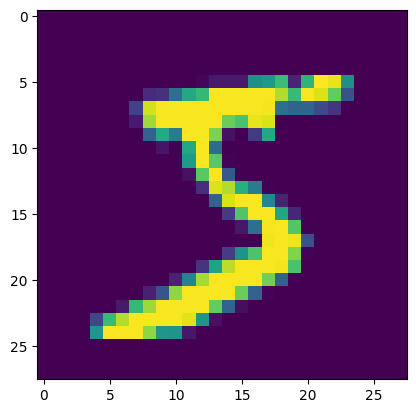

In [26]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=200)
plt.imshow(X_train[0])
print(X_train.shape)
print(X_test.shape)
print(y_train[0])
print(X_train[0])

In [27]:
Class_number=[0,1,2,3,4,5,6,7,8,9]

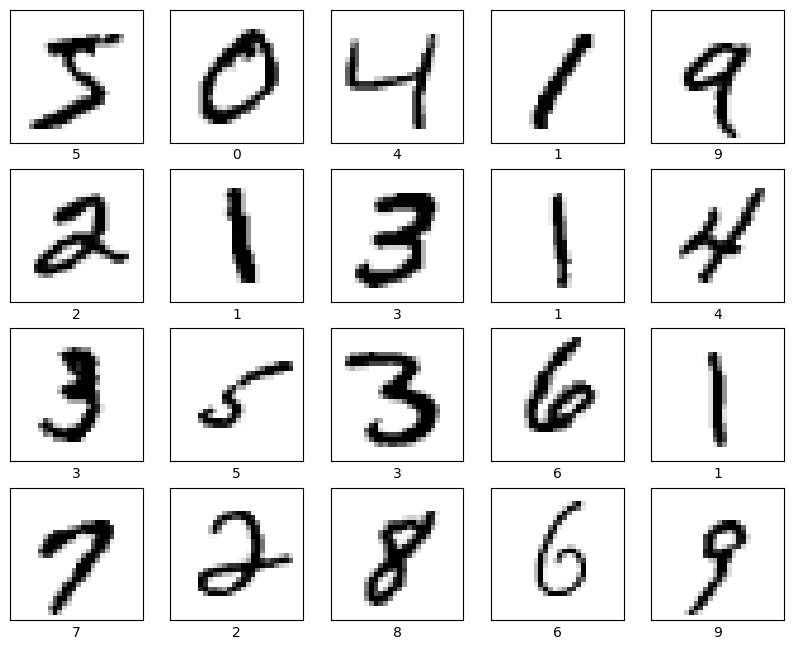

In [28]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(Class_number[y_train[i]])
plt.show()



In [29]:
X_train=X_train/255
X_test=X_test/255

In [30]:
model= tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(510,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
                                    ])

In [31]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,log={}):
    if(log.get('accuracy')>=0.99):
      print("\nReached accuracy cancel training")
      self.model.stop_training=True

In [32]:
callbacks=myCallback()


In [33]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [34]:
model.fit(X_train,y_train,epochs=100, callbacks=[callbacks])

Epoch 1/100
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2014 - accuracy: 0.9409
Epoch 2/100
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0790 - accuracy: 0.9762
Epoch 3/100
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0526 - accuracy: 0.9832
Epoch 4/100
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0362 - accuracy: 0.9886
Epoch 5/100
1871/1875 [============================>.] - ETA: 0s - loss: 0.0271 - accuracy: 0.9911
Reached accuracy cancel training
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0271 - accuracy: 0.9911


In [35]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0680 - accuracy: 0.9807


[0.06799247115850449, 0.9807000160217285]